In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from astropy.time import Time
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
from astropy.coordinates.name_resolve import NameResolveError
from ztfquery.lightcurve import LCQuery
from astropy.coordinates import SkyCoord 
from astropy.cosmology import WMAP9 as cosmo
from astropy.io import fits
from astropy.table import Table
import logging
import sys
from nuztf.ampel_api import ampel_api_name
from nuztf.irsa import plot_irsa_lightcurve
from nuztfpaper.style import plot_dir, output_folder
from nuztfpaper.candidates import candidates

/Users/robertstein/Code/ztf_nu_paper_code/nuztfpaper/alerts.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non["Rejection reason"][mask] = new
/Users/robertstein/Code/ztf_nu_paper_code/nuztfpaper/candidates.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates["base_class"][candidates["base_class"] == "AGN"] = "AGN Variability"


In [2]:
# Set up logging level
for logname in ["nuztf", "nuztfpaper"]:
    logger = logging.getLogger(logname)
    # handler = logging.StreamHandler(sys.stdout)
    # formatter = logging.Formatter('%(name)s - %(levelname)s - %(message)s')
    # handler.setFormatter(formatter)
    # logger.addHandler(handler)
    logger.setLevel(logging.INFO)

In [3]:
sources = candidates[candidates["sub_class"] == "AGN Flare"]

In [4]:
names = [
    ("MCG +00-02-020", "IC190922B"),
    ("WISEA J205314.58+125218.9", "IC191001A"),
    ("ZTF19abexshr", "IC191001A"),
    ("CGCG 67-27", "IC200109A"),
    ("SDSS J105752.69+105037.9", "IC200109A"),
    ("NPM 1G+12.0265", "IC200109A"),
    ("SDSS J104431.98+110105.6", "IC200109A"),
    ("ZTF18aamjqes", "IC200530A"),
    ("WISEA J170539.32+273641.2", "IC200530A"),
    ("WISEA J165707.06+234643.8", "IC200530A"),
    ("ZTF18adbbnry", "IC200916A"),
    ("ZTF20aamoxyt", "IC200929A"),
    ("ZTF18abxrpgu", "IC201130A"),
    ("SDSS J002553.11-091252.1", "IC201209A"),
    ("4C 05.57", "IC210210A"),
    ("SDSS J134034.75+045241.3", "IC210210A"),
    ("WISE J224645.73+122935.7", "IC210629A"),
]

In [5]:
# text = "\\begin{figure*} \n"

# for i, (_, row) in enumerate(sources.iterrows()):
#     print(i, row["Name"], row["Catalogue Name"],row["neutrino"], names[i])
    
# #     try:
# #         plot_irsa_lightcurve(
# #             str(row["Catalogue Name"]),
# #             nu_name=row["neutrino"],
# #             plot_mag=False,
# #             plot_folder=output_folder
# #         )
        
# # #     except (TypeError, NameResolveError) as e:
# #     except (NameResolveError, RemoteServiceError) as e:

#     res = ampel_api_name(row["Name"], with_history=False)[0]
        
#     plot_irsa_lightcurve(
#         row["Name"],
#         source_coords=[res["candidate"]["ra"], res["candidate"]["dec"]],
#         nu_name=row["neutrino"],
#         plot_mag=False,
#         plot_folder=plot_dir,
#         extra_folder=output_folder
#     )
#     text += f"    \centering \includegraphics[width=0.45\\textwidth]{{figures/{row['Name']}_lightcurve_flux}}\n"
    
# text += f"""
#     \caption{{ZTF lightcurves of {len(sources)} AGN flares coincident with high-energy neutrinos.}}
#     \label{{fig:flares}}
# \end{{figure*}}
# """        
        
    
    

In [6]:
# print(text)

In [7]:
literature_candidates = [
    ("PKS 1502+106", "IC190730A"),
#     ("BZB J0955+3551", "IC200107A"),
#     ("PKS 0735+178", "IC211208A")
]

INFO:nuztf.irsa:Using Astropy NED query result for name PKS 1502+106 ([226.10408, 10.49422])
INFO:nuztf.irsa:There are a total of 761 detections for PKS 1502+106
INFO:nuztf.irsa:Most recent detection on 2021-08-28.17 UT at a magnitude of g=19.65+/-0.09
/usr/local/anaconda3/envs/ztf_nu_paper_env/lib/python3.8/site-packages/ztfquery/utils/tools.py:76: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([v[0]*np.cos(theta*_DEG2RA) - v[2]*np.sin(theta*_DEG2RA),
INFO:nuztf.irsa:Target in fields [ 531 1525]
INFO:nuztf.irsa:No recent observation found.


Found match to IC190730A:  IceCube-190730A


INFO:nuztf.irsa:Saving to /Users/robertstein/Code/ztf_nu_paper_code/plots/PKS1502+106_lightcurve_flux.png
INFO:nuztf.irsa:Saving to /Users/robertstein/Work/papers/ztf_nu_paper/figures/PKS1502+106_lightcurve_flux.png


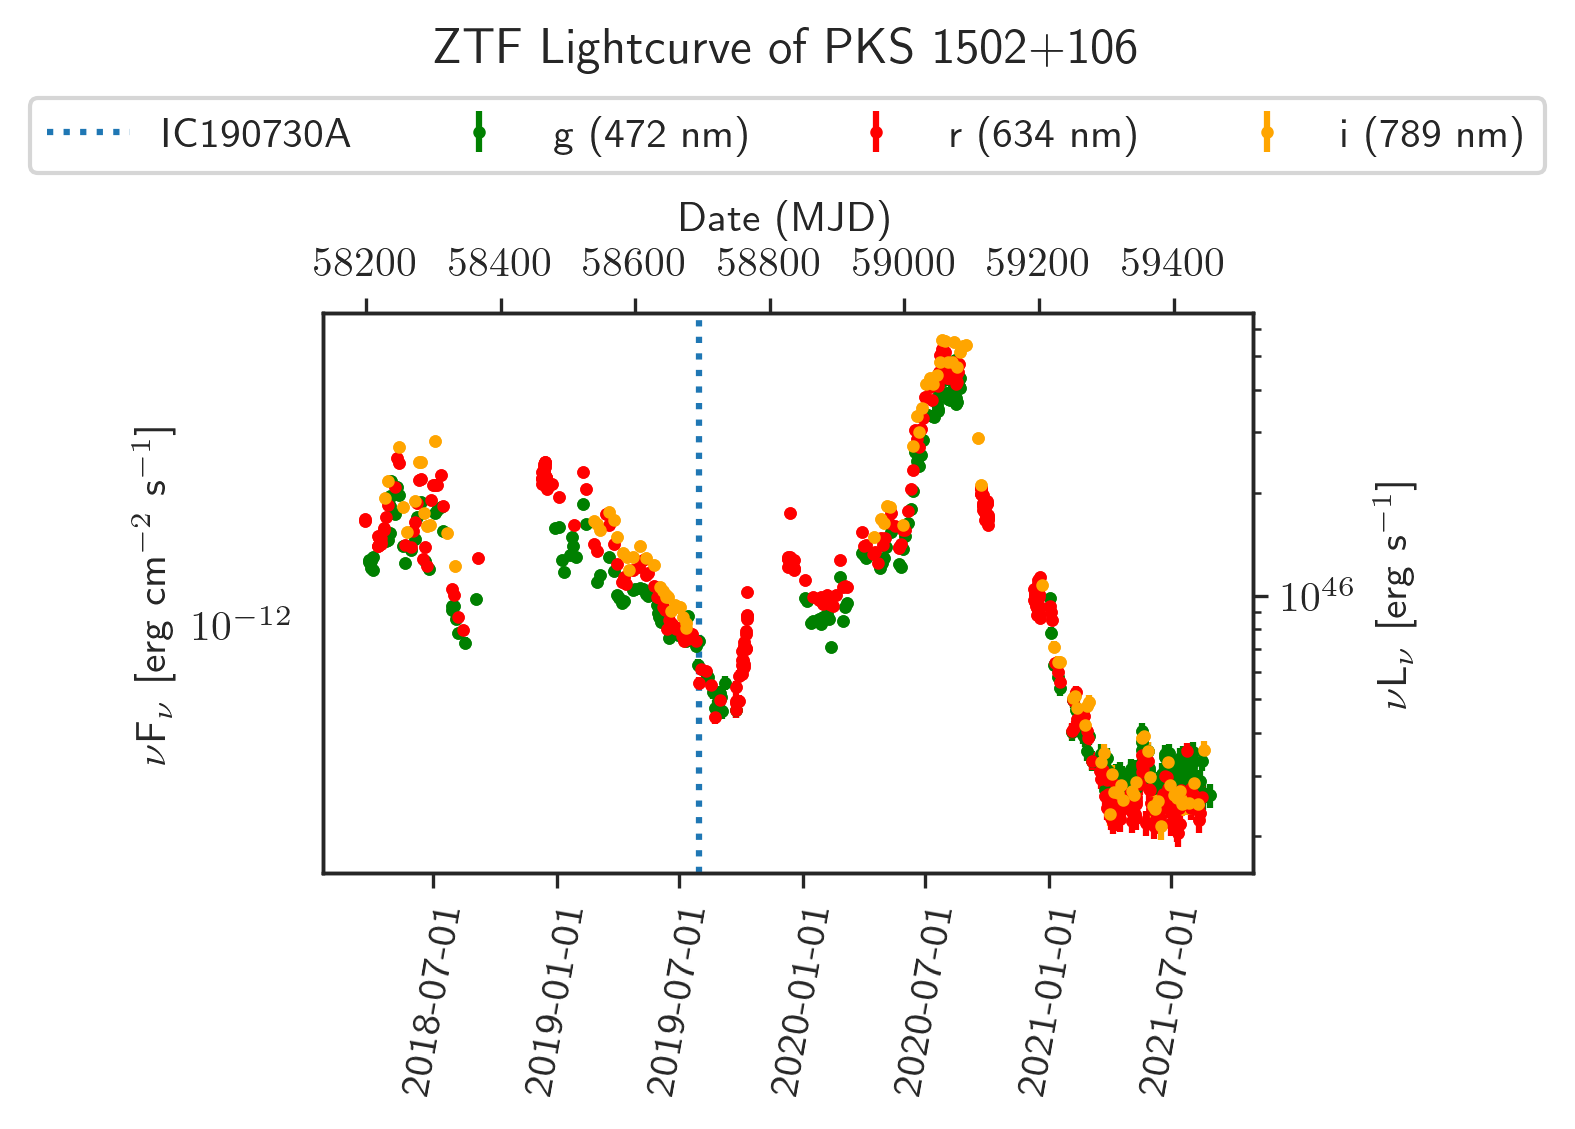

In [8]:
for name, nu in literature_candidates:
    plot_irsa_lightcurve(
        name,
        nu_name=nu,
        plot_mag=False,
        plot_folder=plot_dir,
        extra_folder=output_folder
    )

In [9]:
from astropy.coordinates import SkyCoord

In [10]:
c = SkyCoord(115.0271293, 29.2021507, unit=u.deg, frame='icrs')